In [1]:
from itertools import izip

import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

from gamtools import segregation, cosegregation
from gam_follow_up import config

In [2]:
seg_1NP_40kb = segregation.open_segregation(
    config.in_data_raw('1np-gam-data/gamtools_output/segregation_at_40kb.passed_qc.table'))

In [3]:
seg_3NP_40kb = segregation.open_segregation(
    config.in_data_raw('multiplex-gam-data/gamtools_output/segregation_at_40kb.passed_qc.table'))

In [4]:
seg_all_40kb = segregation.open_segregation(
    config.in_data_processed('segregation-tables/combined_segregation_at_40kb.table'))

In [5]:
def grouper(iterable, n, fillvalue=None):
    args = [iter(iterable)] * n
    return izip(*args)

In [6]:
def get_merged(original_segmentation, merge=2):
    column_indexes = range(len(original_segmentation.columns))

    # Shuffle column indexes in place
    np.random.shuffle(column_indexes)

    # Group them in threes
    index_sets = list(grouper(column_indexes, merge))

    # Merge random columns of the segmentation in groups of three
    return pd.concat(
        [original_segmentation.iloc[:,indexes].any(axis=1).astype(int) for indexes in index_sets],
        axis=1)

In [7]:
hoxa_loc = 'chr6:49000000-54200000'

In [8]:
np.random.seed(64448)

0.162399217486 0.735298712254


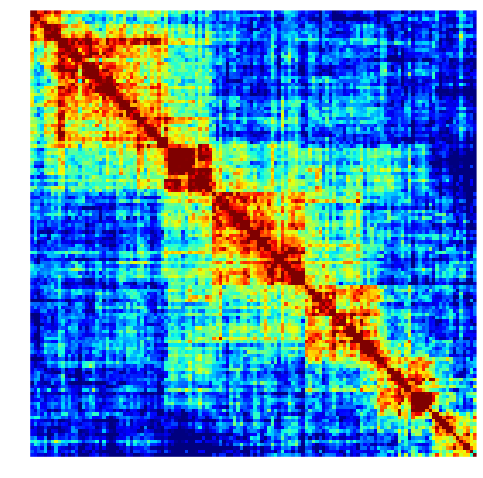

In [9]:
plt.figure(figsize=(8,8), facecolor='white')

hoxa_matrix = cosegregation.get_dprime(seg_1NP_40kb, hoxa_loc)

bottom = np.percentile(hoxa_matrix, 5)
top = np.percentile(hoxa_matrix, 98)

print bottom, top

im = plt.imshow(hoxa_matrix,
    interpolation='none', vmin=0.15, vmax=0.7)

plt.axis('off')

plt.savefig(
    config.in_figures('fig2/hoxa_1NP_matrix.eps'))

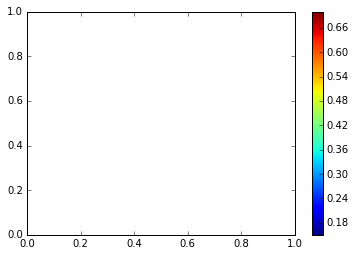

In [12]:
plt.colorbar(im)
plt.savefig(
    config.in_figures('fig2/colorbar.eps'))

0.170673057437 0.751663702726


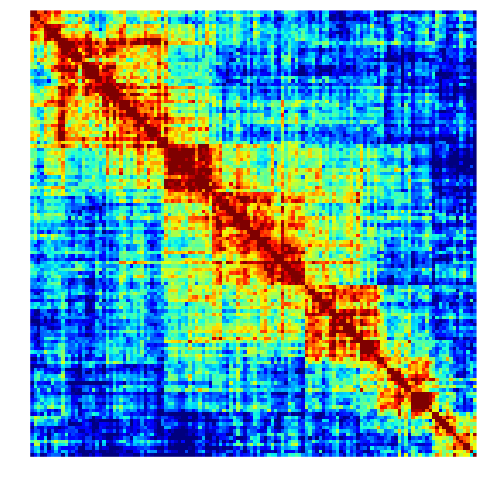

In [16]:
plt.figure(figsize=(8,8), facecolor='white')

hoxa_matrix = cosegregation.get_dprime(get_merged(seg_1NP_40kb, 2), hoxa_loc)

bottom = np.percentile(hoxa_matrix, 5)
top = np.percentile(hoxa_matrix, 98)

print bottom, top

plt.imshow(hoxa_matrix,
    interpolation='none', vmin=0.15, vmax=0.7)

plt.axis('off')

plt.savefig(
    config.in_figures('fig2/hoxa_2NP_insilico_matrix.eps'))

0.156908690929 0.750238752365


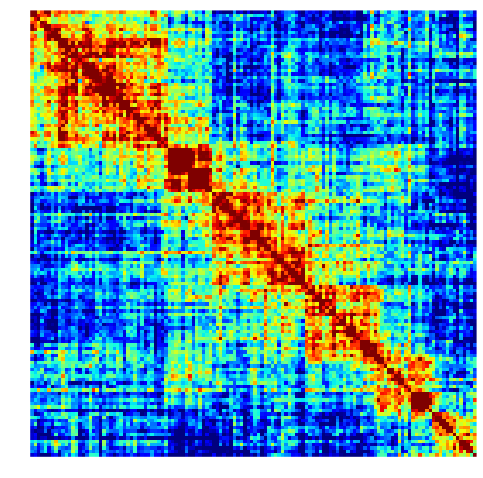

In [17]:
plt.figure(figsize=(8,8), facecolor='white')

hoxa_matrix = cosegregation.get_dprime(get_merged(seg_1NP_40kb, 3), hoxa_loc)

bottom = np.percentile(hoxa_matrix, 5)
top = np.percentile(hoxa_matrix, 98)

print bottom, top

plt.imshow(hoxa_matrix,
    interpolation='none', vmin=0.15, vmax=0.7)

plt.axis('off')

plt.savefig(
    config.in_figures('fig2/hoxa_3NP_insilico_matrix.eps'))

0.1360373348 0.663536605835


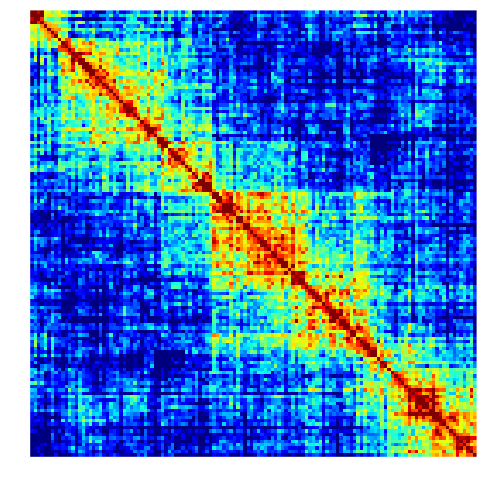

In [22]:
plt.figure(figsize=(8,8), facecolor='white')

hoxa_matrix = cosegregation.get_dprime(seg_3NP_40kb, hoxa_loc)

bottom = np.percentile(hoxa_matrix, 5)
top = np.percentile(hoxa_matrix, 98)

print bottom, top

plt.imshow(hoxa_matrix,
    interpolation='none', vmin=0.15, vmax=0.7)

plt.axis('off')

plt.savefig(
    config.in_figures('fig2/hoxa_3NP_newdata_matrix.eps'))

0.200467303395 0.676787348986


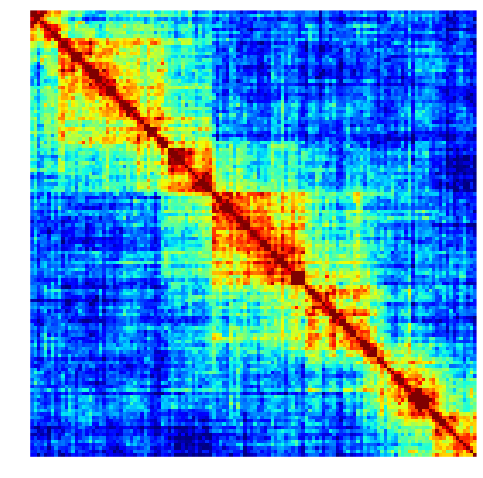

In [23]:
plt.figure(figsize=(8,8), facecolor='white')

hoxa_matrix = cosegregation.get_dprime(seg_all_40kb, hoxa_loc)

bottom = np.percentile(hoxa_matrix, 5)
top = np.percentile(hoxa_matrix, 98)

print bottom, top

plt.imshow(hoxa_matrix,
    interpolation='none', vmin=0.15, vmax=0.7)

plt.axis('off')

plt.savefig(
    config.in_figures('fig2/hoxa_all_NPs_matrix.eps'))

In [15]:
sox2_loc = 'chr3:32098860-36606231'

0.16477650404 0.66696947217


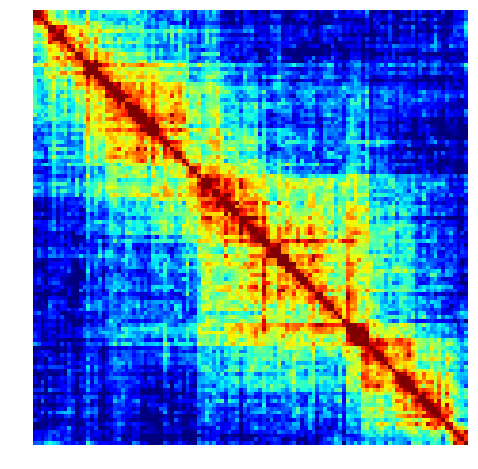

In [25]:
plt.figure(figsize=(8,8), facecolor='white')

sox2_matrix = cosegregation.get_dprime(seg_all_40kb, sox2_loc)

bottom = np.percentile(sox2_matrix, 5)
top = np.percentile(sox2_matrix, 98)

print bottom, top

plt.imshow(sox2_matrix,
    interpolation='none', cmap='jet', vmin=0.16, vmax=0.67)

plt.axis('off')

plt.savefig(
    config.in_figures('fig2/sox2_all_NPs_matrix.eps'))

0.149967983365 0.735323363543


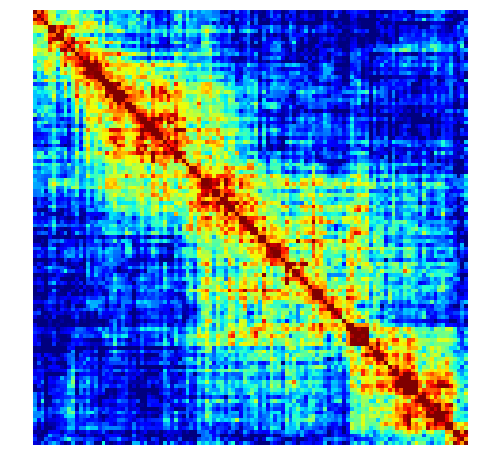

In [24]:
plt.figure(figsize=(8,8), facecolor='white')

sox2_matrix = cosegregation.get_dprime(seg_1NP_40kb, sox2_loc)

bottom = np.percentile(sox2_matrix, 5)
top = np.percentile(sox2_matrix, 98)

print bottom, top

plt.imshow(sox2_matrix,
    interpolation='none', cmap='jet', vmin=0.15, vmax=0.74)

plt.axis('off')

plt.savefig(
    config.in_figures('fig2/sox2_1NPs_matrix.eps'))

0.0771161988378 0.657683140039


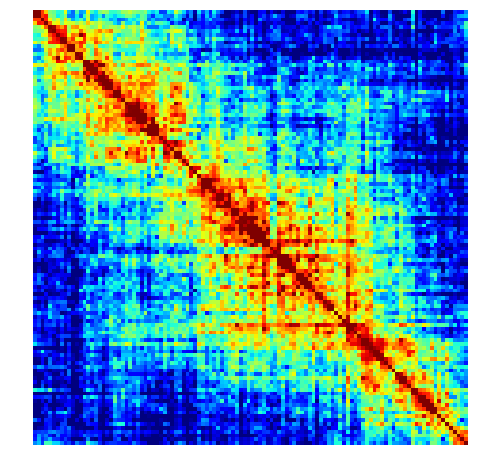

In [23]:
plt.figure(figsize=(8,8), facecolor='white')

sox2_matrix = cosegregation.get_dprime(seg_3NP_40kb, sox2_loc)

bottom = np.percentile(sox2_matrix, 5)
top = np.percentile(sox2_matrix, 98)

print bottom, top

plt.imshow(sox2_matrix,
    interpolation='none', cmap='jet', vmin=0.08, vmax=0.66)

plt.axis('off')

plt.savefig(
    config.in_figures('fig2/sox2_3NPs_matrix.eps'))

In [67]:
possible_regions = []
    
for chrom in ['chr{}'.format(c) for c in range(1,20)]:
    
    print(chrom)

    c_start, c_stop = segregation.index_from_location_string(seg_1NP_40kb, chrom)

    reg_len = 125
    step=60

    iv_start, iv_stop = c_start, c_start+reg_len

    while iv_stop < c_stop:

        region_1np = seg_1NP_40kb.iloc[iv_start:iv_stop]
        region_3np = seg_3NP_40kb.iloc[iv_start:iv_stop]

        cosegs = []
        empty_rows = False
        for dataset in region_1np, region_3np:
            if (dataset.sum(axis=1) == 0).sum() > 0:
                empty_rows = True
                break

            reg_coseg = obs_exp(cosegregation.get_dprime_from_regions(dataset))

            cosegs.append(reg_coseg.flatten().reshape((1, reg_len**2)))

        iv_coords = iv_start, iv_stop

        iv_start += step
        iv_stop += step

        if empty_rows:
            print('Too many empty rows!')
            continue

        region_data = np.concatenate(cosegs, axis=0)

        all_numbers = np.isfinite(region_data).all(axis=0)

        min_corr = np.corrcoef(region_data[:, all_numbers]).min()
        possible_regions.append((min_corr, iv_coords))
        #print(possible_regions[-1])

chr1
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
chr2
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
chr3
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
chr4
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty rows!
Too many empty

(array([  3.,   6.,   8.,   8.,  19.,  47.,  67.,  85.,  95.,  83.,  88.,
         88.,  66.,  40.,  39.,  19.,  15.,   5.,   7.,   4.,   2.,   2.,
          0.,   0.,   1.]),
 array([ -1.33483091e-01,  -1.11183346e-01,  -8.88836012e-02,
         -6.65838562e-02,  -4.42841112e-02,  -2.19843662e-02,
          3.15378798e-04,   2.26151238e-02,   4.49148688e-02,
          6.72146138e-02,   8.95143588e-02,   1.11814104e-01,
          1.34113849e-01,   1.56413594e-01,   1.78713339e-01,
          2.01013084e-01,   2.23312829e-01,   2.45612574e-01,
          2.67912319e-01,   2.90212064e-01,   3.12511809e-01,
          3.34811554e-01,   3.57111299e-01,   3.79411044e-01,
          4.01710789e-01,   4.24010534e-01]),
 <a list of 25 Patch objects>)

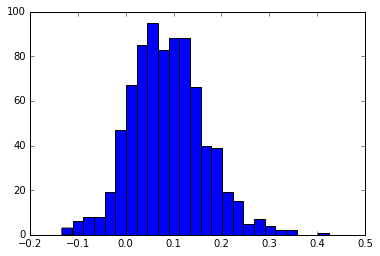

In [68]:
plt.hist([r[0] for r in possible_regions], bins=25)

In [69]:
np.percentile([r[0] for r in possible_regions], 70)

0.12432653299329505

In [72]:
[r for r in possible_regions if 0.15 < r[0] < 0.155]

[(0.15017087944705407, (1800, 1925)),
 (0.15312963753700834, (5290, 5415)),
 (0.15020768252698341, (5830, 5955)),
 (0.15255054110743624, (17991, 18116)),
 (0.15088442044280104, (31310, 31435)),
 (0.15439251996939601, (27556, 27681)),
 (0.15163532761889617, (39242, 39367)),
 (0.15076791656259902, (39302, 39427)),
 (0.15292325853731298, (40272, 40397)),
 (0.15473891616855998, (41832, 41957)),
 (0.15474266838871595, (56191, 56316)),
 (0.15392017525718765, (65109, 65234))]

(0.156352260376805, (1560, 1685))


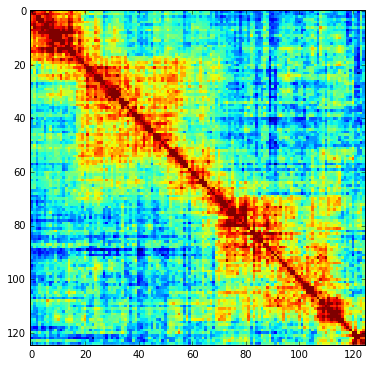

(0.15612850194609273, (14961, 15086))


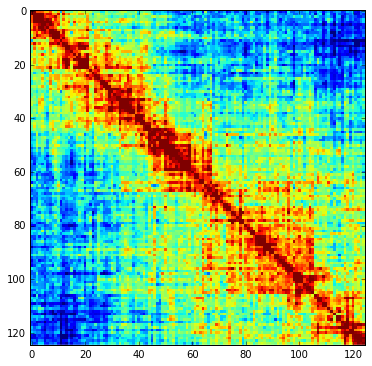

(0.15641758866730793, (21942, 22067))


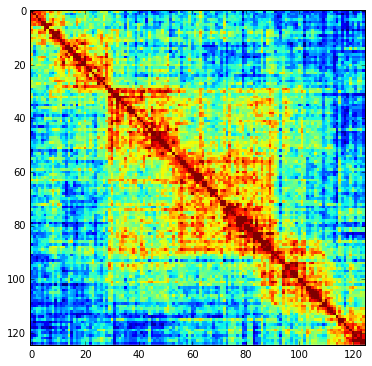

(0.15529329725570656, (23982, 24107))


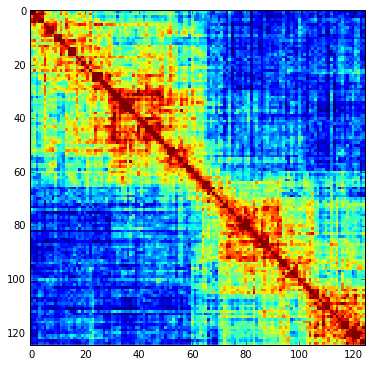

(0.15664588854113096, (52343, 52468))


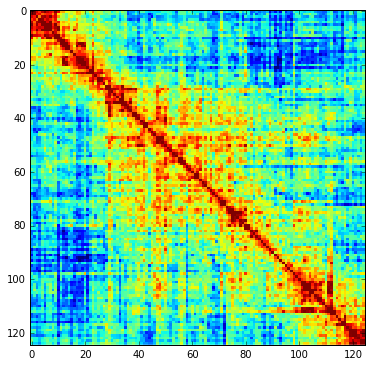

(0.15661404195119913, (58359, 58484))


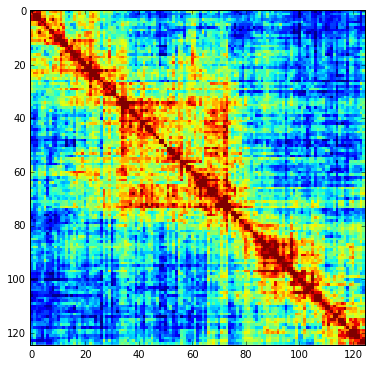

In [76]:
for reg_corr, (iv_start, iv_stop) in [r for r in possible_regions if 0.155 < r[0] < 0.157]:
    print(reg_corr, (iv_start, iv_stop))
    
    plt.figure(figsize=(6,6))
    plt.imshow(cosegregation.get_dprime_from_regions(seg_1NP_40kb.iloc[iv_start:iv_stop]),
               cmap='jet', interpolation='none', vmin=0.05, vmax=0.72)
    plt.show()



In [83]:
selected_regions = [(32750, 32875),
(1560, 1685),
(21942, 22067),
(58359, 58484)]

In [90]:
for s in selected_regions:
    schrom = seg_1NP_40kb.iloc[slice(*s)].iloc[0].name[0]
    sstart = seg_1NP_40kb.iloc[slice(*s)].iloc[0].name[1]
    sstop = seg_1NP_40kb.iloc[slice(*s)].iloc[-1].name[2]
    print('{}:{}-{}'.format(schrom, sstart, sstop))

chr6:144000000-149000000
chr1:62400000-67400000
chr5:16800000-21800000
chr16:40800000-45800000


In [94]:
stats.describe(mat, axis=None)

DescribeResult(nobs=15625, minmax=(-35.441095963024203, 16.112757620956877), mean=1.0, variance=0.36347663238196731, skewness=-25.719477275452885, kurtosis=1852.1492318838514)

In [96]:
stats.describe(cosegregation.get_cosesgregation(seg_1NP_40kb, 'chr17', 'chr16'), axis=None)

DescribeResult(nobs=5854956, minmax=(0.0, 95.0), mean=3.3918394946093531, variance=5.3851993151012687, skewness=0.8584743221856205, kurtosis=2.9662660683566324)

In [99]:
339. / 480

0.70625

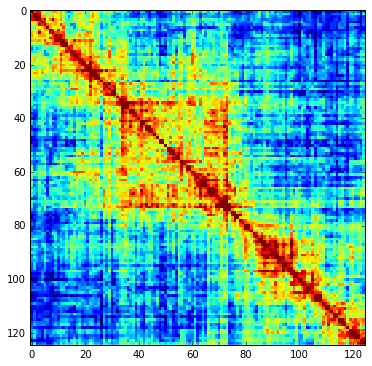

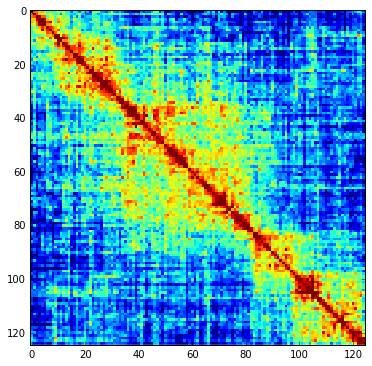

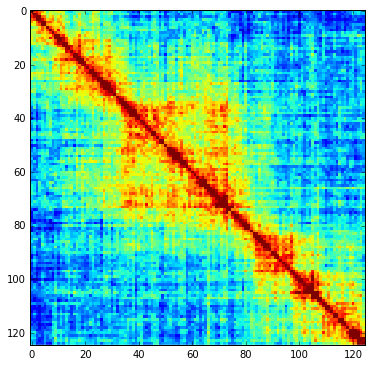

In [81]:
iv_start, iv_stop = 58359, 58484

plt.figure(figsize=(6,6))
plt.imshow(cosegregation.get_dprime_from_regions(seg_1NP_40kb.iloc[iv_start:iv_stop]),
           cmap='jet', interpolation='none', vmin=0.05, vmax=0.75)
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(cosegregation.get_dprime_from_regions(seg_3NP_40kb.iloc[iv_start:iv_stop]),
           cmap='jet', interpolation='none', vmin=0.05, vmax=0.65)
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(cosegregation.get_dprime_from_regions(seg_all_40kb.iloc[iv_start:iv_stop]),
           cmap='jet', interpolation='none', vmin=0.05, vmax=0.68)
plt.show()


In [21]:
mat = cosegregation.get_dprime_from_regions(seg_1NP_40kb.iloc[iv_start:iv_stop])

In [23]:
def kth_diag_indices(a, k):
    rows, cols = np.diag_indices_from(a)
    if k < 0:
        return rows[-k:], cols[:k]
    elif k > 0:
        return rows[:-k], cols[k:]
    else:
        return rows, cols

In [27]:
np.nanmean(mat.diagonal(3))

0.56807695280333037

In [39]:
def obs_exp(input_matrix):
    
    mat = input_matrix.copy()

    for diag in range(1, np.min(mat.shape)):

        mat[kth_diag_indices(mat, diag)] = mat.diagonal(diag) / np.nanmean(mat.diagonal(diag))
        mat[kth_diag_indices(mat, -diag)] = mat.diagonal(diag) / np.nanmean(mat.diagonal(diag))
        
    return mat

125